In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 15,15
data = pd.read_excel('Data_Train.xlsx')
data_submit = pd.read_excel('Test_set.xlsx')
data.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
data_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


One missing value, not that bad, we will drop it

In [4]:
data = data.dropna()

# Data Transformation

## Date of The Journey

In [5]:
data.Date_of_Journey.unique().tolist()

['24/03/2019',
 '1/05/2019',
 '9/06/2019',
 '12/05/2019',
 '01/03/2019',
 '24/06/2019',
 '12/03/2019',
 '27/05/2019',
 '1/06/2019',
 '18/04/2019',
 '9/05/2019',
 '24/04/2019',
 '3/03/2019',
 '15/04/2019',
 '12/06/2019',
 '6/03/2019',
 '21/03/2019',
 '3/04/2019',
 '6/05/2019',
 '15/05/2019',
 '18/06/2019',
 '15/06/2019',
 '6/04/2019',
 '18/05/2019',
 '27/06/2019',
 '21/05/2019',
 '06/03/2019',
 '3/06/2019',
 '15/03/2019',
 '3/05/2019',
 '9/03/2019',
 '6/06/2019',
 '24/05/2019',
 '09/03/2019',
 '1/04/2019',
 '21/04/2019',
 '21/06/2019',
 '27/03/2019',
 '18/03/2019',
 '12/04/2019',
 '9/04/2019',
 '1/03/2019',
 '03/03/2019',
 '27/04/2019']

As you can see, there is only one year. I know that flight ticket are influenced by the period in the year, so I will keep only the month and the day. Plus as far as I'm concerned, flight tickets are more expensive during the week-end, so I will add a feature the numero of the day in week, and the name of the day

In [6]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data_submit['Date_of_Journey'] = pd.to_datetime(data_submit['Date_of_Journey'])

In [7]:
data['Month'] = data['Date_of_Journey'].dt.month
data['Day'] = data['Date_of_Journey'].dt.day
data['dayofweek_num'] = data['Date_of_Journey'].dt.dayofweek
data['dayofweek_name'] = data['Date_of_Journey'].dt.day_name()
data = data.drop(['Date_of_Journey'], axis=1)
data_submit['Month'] = data_submit['Date_of_Journey'].dt.month
data_submit['Day'] = data_submit['Date_of_Journey'].dt.day
data_submit['dayofweek_num'] = data_submit['Date_of_Journey'].dt.dayofweek
data_submit['dayofweek_name'] = data_submit['Date_of_Journey'].dt.day_name()
data_submit = data_submit.drop(['Date_of_Journey'], axis=1)
data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,6,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,Saturday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,4,Friday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,3,Thursday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,3,Thursday
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,6,24,0,Monday
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,1,Tuesday
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,3,Thursday
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,1,Tuesday
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,5,27,0,Monday


## Route & Total Stops

In [8]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

As we can see, there is at max 4 stops

In [9]:
def check_and_return_stop(x,i):
    x = x.split(' → ')
    if len(x) < 2+i:
        return float('nan')
    else:
        return x[i]
def transform_route_feature(df):
    df['stopover_1'] = df['Route'].apply(check_and_return_stop, args=(1,))
    df['stopover_2'] = df['Route'].apply(check_and_return_stop, args=(2,))
    df['stopover_3'] = df['Route'].apply(check_and_return_stop, args=(3,))
    df['stopover_4'] = df['Route'].apply(check_and_return_stop, args=(4,))
    return df

In [10]:
data = transform_route_feature(data)
data_submit = transform_route_feature(data_submit)

In [11]:
data = data.drop(['Route'], axis=1)
data_submit = data_submit.drop(['Route'], axis=1)

In [12]:
def return_total_stop(x):
    x = x.split()
    if len(x) < 2:
        return int(0)
    else:
        return int(x[0])

In [13]:
data['total_stop'] = data['Total_Stops'].apply(return_total_stop)
data_submit['total_stop'] = data_submit['Total_Stops'].apply(return_total_stop)
data = data.drop(['Total_Stops'], axis=1)
data_submit = data_submit.drop(['Total_Stops'], axis=1)
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,stopover_3,stopover_4,total_stop
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,No info,3897,3,24,6,Sunday,NaN,NaN,NaN,NaN,0
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,No info,7662,1,5,5,Saturday,IXR,BBI,NaN,NaN,2
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,No info,13882,9,6,4,Friday,LKO,BOM,NaN,NaN,2
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,No info,6218,12,5,3,Thursday,NAG,NaN,NaN,NaN,1
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,No info,13302,1,3,3,Thursday,NAG,NaN,NaN,NaN,1


## Dep Time & Arrival Time

In [14]:
def transform_dep_time(df):
    df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
    df['Hour_Dep'] = df['Dep_Time'].dt.hour
    return df

In [15]:
data = transform_dep_time(data)
data_submit = transform_dep_time(data_submit)
data = data.drop(['Dep_Time'], axis=1)
data_submit = data_submit.drop(['Dep_Time'], axis=1)
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,No info,3897,3,24,6,Sunday,NaN,NaN,NaN,NaN,0,22
1,Air India,Kolkata,Banglore,13:15,7h 25m,No info,7662,1,5,5,Saturday,IXR,BBI,NaN,NaN,2,5
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,No info,13882,9,6,4,Friday,LKO,BOM,NaN,NaN,2,9
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,No info,6218,12,5,3,Thursday,NAG,NaN,NaN,NaN,1,18
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,No info,13302,1,3,3,Thursday,NAG,NaN,NaN,NaN,1,16


In [16]:
def transform_arr_time(df):
    df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
    df['Hour_Arr'] = df['Arrival_Time'].dt.hour
    return df

In [17]:
data = transform_arr_time(data)
data_submit = transform_arr_time(data_submit)
data = data.drop(['Arrival_Time'], axis=1)
data_submit = data_submit.drop(['Arrival_Time'], axis=1)
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,Hour_Arr
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,3,24,6,Sunday,NaN,NaN,NaN,NaN,0,22,1
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,1,5,5,Saturday,IXR,BBI,NaN,NaN,2,5,13
2,Jet Airways,Delhi,Cochin,19h,No info,13882,9,6,4,Friday,LKO,BOM,NaN,NaN,2,9,4
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,12,5,3,Thursday,NAG,NaN,NaN,NaN,1,18,23
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,1,3,3,Thursday,NAG,NaN,NaN,NaN,1,16,21


I think that going at 12h and arriving at 18h is more expensive than going at 2h and arriving at 8h, that's why I decided to took the hour of the departure time and arrival time

## Duration

This is one of the most feature since the price is highly dependent on it (the longer it is, the most expensive it is)

In [18]:
def extract_duration_hours(x):
    x = x.split()
    if len(x) < 2:
        if 'm' in x[0]:
            return float('0.' + x[0].split('m')[0])
        return float(x[0].split('h')[0])
    else:
        return float(x[0].split('h')[0] + '.' + x[1].split('m')[0])
def duration(df):
    df['Duration'] = df['Duration'].apply(extract_duration_hours)
    return df

In [19]:
data = duration(data)
data_submit = duration(data_submit)

In [20]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,Hour_Arr
0,IndiGo,Banglore,New Delhi,2.50,No info,3897,3,24,6,Sunday,NaN,NaN,NaN,NaN,0,22,1
1,Air India,Kolkata,Banglore,7.25,No info,7662,1,5,5,Saturday,IXR,BBI,NaN,NaN,2,5,13
2,Jet Airways,Delhi,Cochin,19.00,No info,13882,9,6,4,Friday,LKO,BOM,NaN,NaN,2,9,4
3,IndiGo,Kolkata,Banglore,5.25,No info,6218,12,5,3,Thursday,NAG,NaN,NaN,NaN,1,18,23
4,IndiGo,Banglore,New Delhi,4.45,No info,13302,1,3,3,Thursday,NAG,NaN,NaN,NaN,1,16,21


In [21]:
## Stuff do the Additional_Info Feature
data = data.replace('No Info', 'No info')
data_submit = data_submit.replace('No Info', 'No info')

In [22]:
data.Additional_Info.unique().tolist()

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Short layover',
 '1 Long layover',
 'Change airports',
 'Business class',
 'Red-eye flight',
 '2 Long layover']

In [23]:
import copy
data_train = copy.deepcopy(data)
data_submit_ = copy.deepcopy(data_submit)

# OPTION 1 : One Hot Enconding

In [24]:
for col in ['Airline', 'Source', 'Destination', 'dayofweek_name']:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
    data = data.drop([col], axis=1)

In [25]:
data = pd.concat([data, pd.get_dummies(data['Additional_Info'], prefix='Info', drop_first=True)], axis=1)
data = data.drop(['Additional_Info'], axis=1)

In [26]:
data.head()

,Duration,Price,Month,Day,dayofweek_num,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,...,dayofweek_name_Tuesday,dayofweek_name_Wednesday,Info_1 Short layover,Info_2 Long layover,Info_Business class,Info_Change airports,Info_In-flight meal not included,Info_No check-in baggage included,Info_No info,Info_Red-eye flight
0,2.50,3897,3,24,6,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
1,7.25,7662,1,5,5,IXR,BBI,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0
2,19.00,13882,9,6,4,LKO,BOM,NaN,NaN,2,...,0,0,0,0,0,0,0,0,1,0
3,5.25,6218,12,5,3,NAG,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,1,0
4,4.45,13302,1,3,3,NAG,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,1,0


In [27]:
for col in ['Airline', 'Source', 'Destination', 'dayofweek_name']:
    data_submit = pd.concat([data_submit, pd.get_dummies(data_submit[col], prefix=col)], axis=1)
    data_submit = data_submit.drop([col], axis=1)

In [28]:
data_submit = pd.concat([data_submit, pd.get_dummies(data_submit['Additional_Info'], prefix='Info', drop_first=True)], axis=1)
data_submit = data_submit.drop(['Additional_Info'], axis=1)

In [29]:
data_submit.head()

,Duration,Month,Day,dayofweek_num,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,dayofweek_name_Saturday,dayofweek_name_Sunday,dayofweek_name_Thursday,dayofweek_name_Tuesday,dayofweek_name_Wednesday,Info_Business class,Info_Change airports,Info_In-flight meal not included,Info_No check-in baggage included,Info_No info
0,10.55,6,6,3,BOM,NaN,NaN,NaN,1,17,...,0,0,1,0,0,0,0,0,0,1
1,4.00,12,5,3,MAA,NaN,NaN,NaN,1,6,...,0,0,1,0,0,0,0,0,0,1
2,23.45,5,21,1,BOM,NaN,NaN,NaN,1,19,...,0,0,0,1,0,0,0,1,0,0
3,13.00,5,21,1,BOM,NaN,NaN,NaN,1,8,...,0,0,0,1,0,0,0,0,0,1
4,2.50,6,24,0,NaN,NaN,NaN,NaN,0,23,...,0,0,0,0,0,0,0,0,0,1


In [30]:
[x for x in data.columns.tolist() if x not in data_submit.columns.tolist()]

['Price',
 'Airline_Trujet',
 'Info_1 Short layover',
 'Info_2 Long layover',
 'Info_Red-eye flight']

In [31]:
data_submit[[ 'Airline_Trujet',
 'Info_1 Short layover',
 'Info_2 Long layover',
 'Info_Red-eye flight']] = 0

In [32]:
data_submit.head()

,Duration,Month,Day,dayofweek_num,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,dayofweek_name_Wednesday,Info_Business class,Info_Change airports,Info_In-flight meal not included,Info_No check-in baggage included,Info_No info,Airline_Trujet,Info_1 Short layover,Info_2 Long layover,Info_Red-eye flight
0,10.55,6,6,3,BOM,NaN,NaN,NaN,1,17,...,0,0,0,0,0,1,0,0,0,0
1,4.00,12,5,3,MAA,NaN,NaN,NaN,1,6,...,0,0,0,0,0,1,0,0,0,0
2,23.45,5,21,1,BOM,NaN,NaN,NaN,1,19,...,0,0,0,1,0,0,0,0,0,0
3,13.00,5,21,1,BOM,NaN,NaN,NaN,1,8,...,0,0,0,0,0,1,0,0,0,0
4,2.50,6,24,0,NaN,NaN,NaN,NaN,0,23,...,0,0,0,0,0,1,0,0,0,0


# Modelisation 

## Baseline

In [32]:
from pycaret.regression import *
reg1 = setup(data, target = 'Price', session_id = 123,
             ignore_low_variance = True, combine_rare_levels = True, silent=True)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(10682, 50)"
3,Missing Values,True
4,Numeric Features,41
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7477, 98)"


In [33]:
compare_models(exclude = ['br', 'en', 'lar', 'llar', 'omp', 'ard', 'par', 'ransac', 'tr', 'mlp'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,877.3541,3174123.0295,1715.6003,0.8627,0.1477,0.1030,3.6370
xgboost,Extreme Gradient Boosting,820.1769,3261895.3875,1749.5039,0.8577,0.1430,0.0947,1.0780
lightgbm,Light Gradient Boosting Machine,937.6306,3378767.2114,1775.9019,0.8532,0.1557,0.1103,0.0540
rf,Random Forest Regressor,724.5014,3638441.6254,1823.0931,0.8434,0.1392,0.0803,0.6690
et,Extra Trees Regressor,747.2906,3937737.1275,1939.3462,0.8250,0.1533,0.0820,0.7840
gbr,Gradient Boosting Regressor,1230.7355,4676478.1681,2101.7671,0.7955,0.1935,0.1471,0.3010
dt,Decision Tree Regressor,810.3398,5751930.6014,2304.3209,0.7464,0.1738,0.0888,0.0270
ridge,Ridge Regression,1532.6990,5946741.0500,2387.6431,0.7374,0.2582,0.1929,0.0270
lr,Linear Regression,1535.6394,5954705.0500,2389.2490,0.7370,0.2607,0.1934,0.3500
lasso,Lasso Regression,1534.0873,5960474.4250,2390.4704,0.7368,0.2549,0.1926,0.0720


In [34]:
# Take the 3 bests models
catb = create_model('catboost', verbose=False)
xgb = create_model('xgboost', verbose=False)
rf = create_model('rf', verbose=False)

In [35]:
# Blend all the 3 bests models
blend_all = blend_models(estimator_list = [catb, xgb, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,713.4289,1790593.0452,1338.1304,0.9047,0.1218,0.0816
1,813.2996,5164276.8890,2272.5045,0.7990,0.1425,0.0840
2,694.9650,1601959.9957,1265.6856,0.9199,0.1185,0.0815
3,777.8721,3359822.6223,1832.9819,0.8484,0.1366,0.0914
4,718.4631,1384573.0964,1176.6788,0.9184,0.1307,0.0905
5,755.2410,2019559.9357,1421.1122,0.8983,0.1344,0.0881
6,785.5728,1819646.4101,1348.9427,0.9149,0.1366,0.0899
7,853.2413,5230941.2934,2287.1251,0.7944,0.1508,0.0900
8,833.7656,7064311.5075,2657.8773,0.7525,0.1454,0.0929
9,714.0869,1556268.9460,1247.5051,0.9182,0.1309,0.0866


In [36]:
# Finalise models and make predictions
final_blender = finalize_model(blend_all)
predictions = predict_model(final_blender, data = data_submit)
predictions.head()

,Duration,Month,Day,dayofweek_num,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,Info_Business class,Info_Change airports,Info_In-flight meal not included,Info_No check-in baggage included,Info_No info,Airline_Trujet,Info_1 Short layover,Info_2 Long layover,Info_Red-eye flight,Label
0,10.55,6,6,3,BOM,NaN,NaN,NaN,1,17,...,0,0,0,0,1,0,0,0,0,14342.288390
1,4.00,12,5,3,MAA,NaN,NaN,NaN,1,6,...,0,0,0,0,1,0,0,0,0,4611.181858
2,23.45,5,21,1,BOM,NaN,NaN,NaN,1,19,...,0,0,1,0,0,0,0,0,0,12782.007633
3,13.00,5,21,1,BOM,NaN,NaN,NaN,1,8,...,0,0,0,0,1,0,0,0,0,11002.521187
4,2.50,6,24,0,NaN,NaN,NaN,NaN,0,23,...,0,0,0,0,1,0,0,0,0,4086.015493


In [37]:
predictions['Price'] = predictions['Label']
predictions[['Price']].to_excel('submissions.xlsx', index=False)

**We got a score of 0.9449 (rank : 85), I think we can do better than that**

# OPTION 2 : Label Encode + HotEncode ?

We will try the label encoding technique and hot encoding

In [25]:
all_ = pd.concat([data_train, data_submit_])

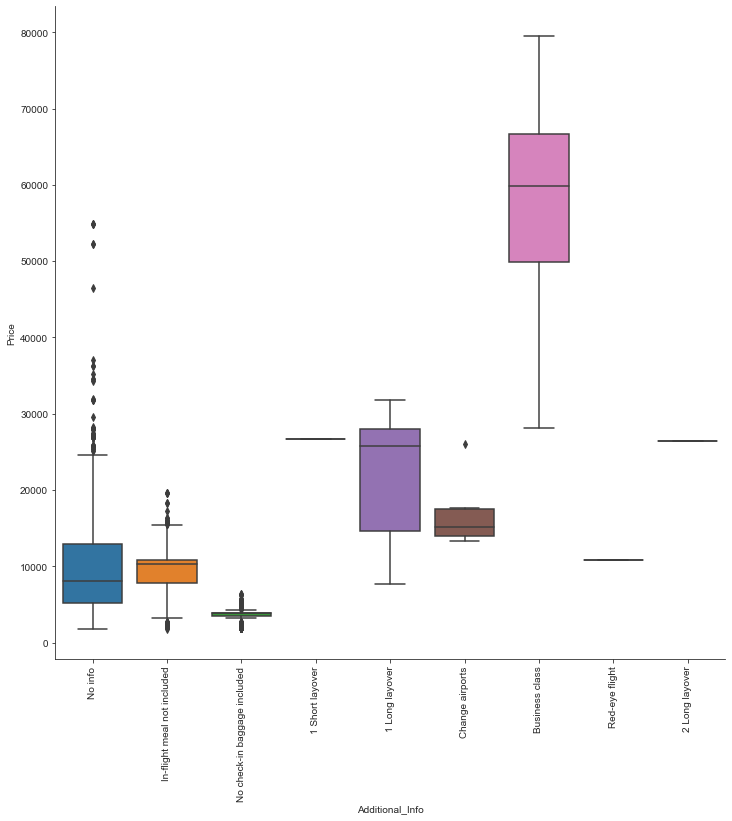

In [25]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Additional_Info", y="Price", data=all_, ax=ax)
plt.xticks(rotation=90)
sns.despine()

In [26]:
## I will associate label according to the distribution of the price for each label in Additional Info
all_ = all_.replace('No info', float(0))
all_ = all_.replace('In-flight meal not included', -float(1)) # Less expensive
all_ = all_.replace('No check-in baggage included', -float(2)) # Mostly less expensive
all_ = all_.replace('1 Short layover', float(0.5)) # Since we only one data point
all_ = all_.replace('2 Long layover', float(0.5)) # Since we only have one data point
all_ = all_.replace('Change airports', float(1))
all_ = all_.replace('1 Long layover', float(1.5))
all_ = all_.replace('Red-eye flight', float(0)) # Since we only have one data point
all_ = all_.replace('Business class', float(3))
all_.Additional_Info.value_counts()

 0.0    10496
-1.0     2426
-2.0      396
 1.5       20
 1.0        8
 3.0        5
 0.5        2
Name: Additional_Info, dtype: int64

## Source / Destination

In [27]:
test = copy.deepcopy(data_train)
test['Comb_Source_Dest'] = test.apply(lambda x: x['Source'] + '/' + x['Destination'], axis=1)

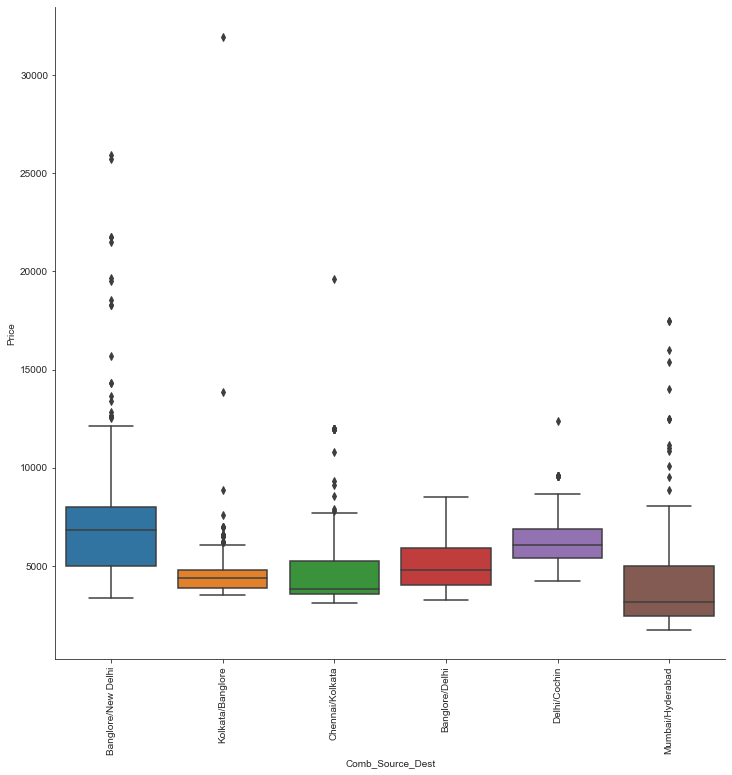

In [28]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Comb_Source_Dest", y="Price", data=test[test['total_stop']==0], ax=ax)
plt.xticks(rotation=90)
sns.despine()

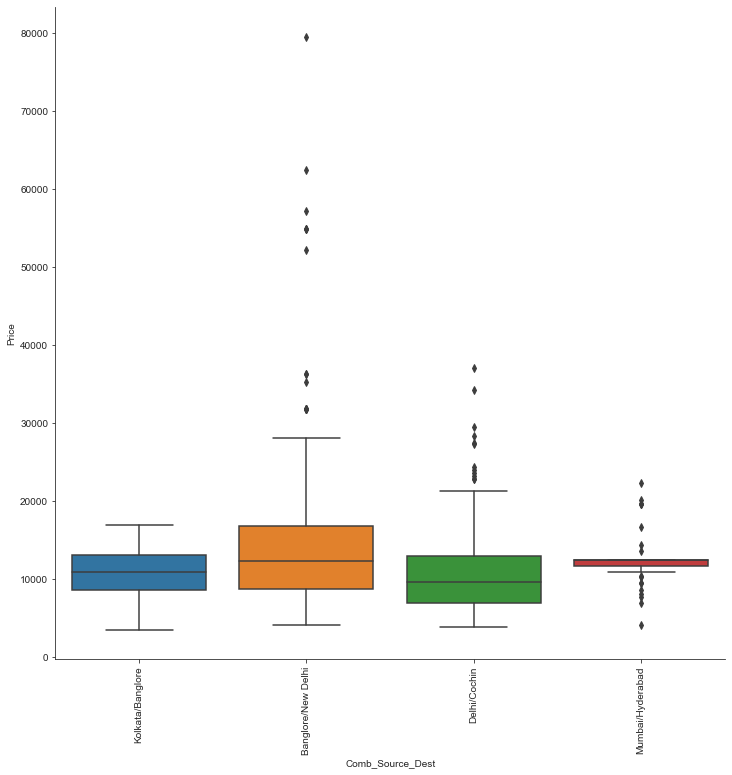

In [84]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Comb_Source_Dest", y="Price", data=test[test['total_stop']==1], ax=ax)
plt.xticks(rotation=90)
sns.despine()

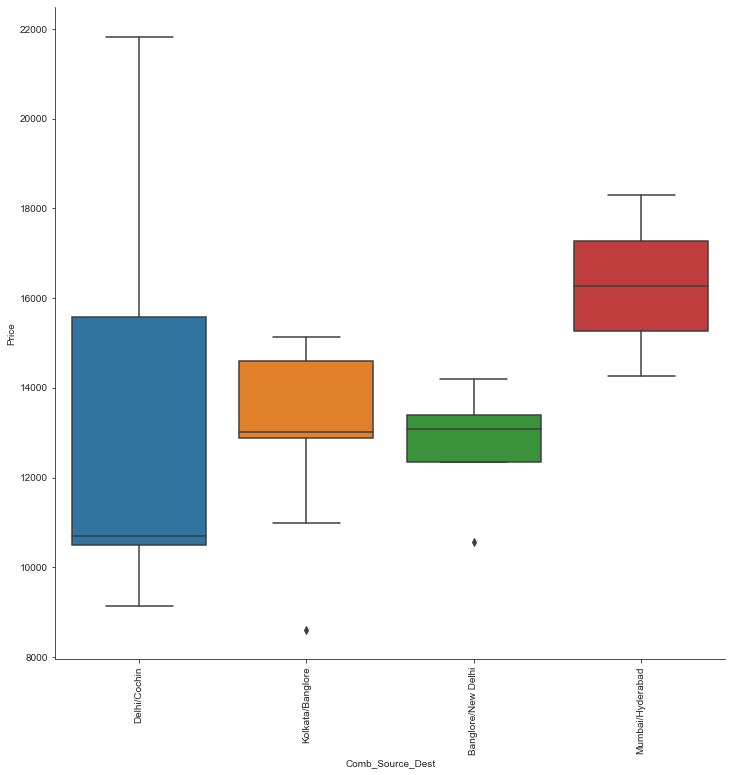

In [83]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Comb_Source_Dest", y="Price", data=test[test['total_stop']==3], ax=ax)
plt.xticks(rotation=90)
sns.despine()

We can notice that the route (Source-Destination) can influence the price (taking into account the number total stop)
I think I will hot encode this feature, and drop Source & Destination

In [28]:
all_['Comb_Source_Dest'] = all_.apply(lambda x: x['Source'] + '/' + x['Destination'], axis=1)
all_ = pd.concat([all_, pd.get_dummies(all_['Comb_Source_Dest'], prefix='CSD')], axis=1)
all_ = all_.drop(['Comb_Source_Dest', 'Source', 'Destination'], axis=1)
all_.head()

,Airline,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,...,stopover_4,total_stop,Hour_Dep,Hour_Arr,CSD_Banglore/Delhi,CSD_Banglore/New Delhi,CSD_Chennai/Kolkata,CSD_Delhi/Cochin,CSD_Kolkata/Banglore,CSD_Mumbai/Hyderabad
0,IndiGo,2.50,0.0,3897.0,3,24,6,Sunday,NaN,NaN,...,NaN,0,22,1,0,1,0,0,0,0
1,Air India,7.25,0.0,7662.0,1,5,5,Saturday,IXR,BBI,...,NaN,2,5,13,0,0,0,0,1,0
2,Jet Airways,19.00,0.0,13882.0,9,6,4,Friday,LKO,BOM,...,NaN,2,9,4,0,0,0,1,0,0
3,IndiGo,5.25,0.0,6218.0,12,5,3,Thursday,NAG,NaN,...,NaN,1,18,23,0,0,0,0,1,0
4,IndiGo,4.45,0.0,13302.0,1,3,3,Thursday,NAG,NaN,...,NaN,1,16,21,0,1,0,0,0,0


## AirLine

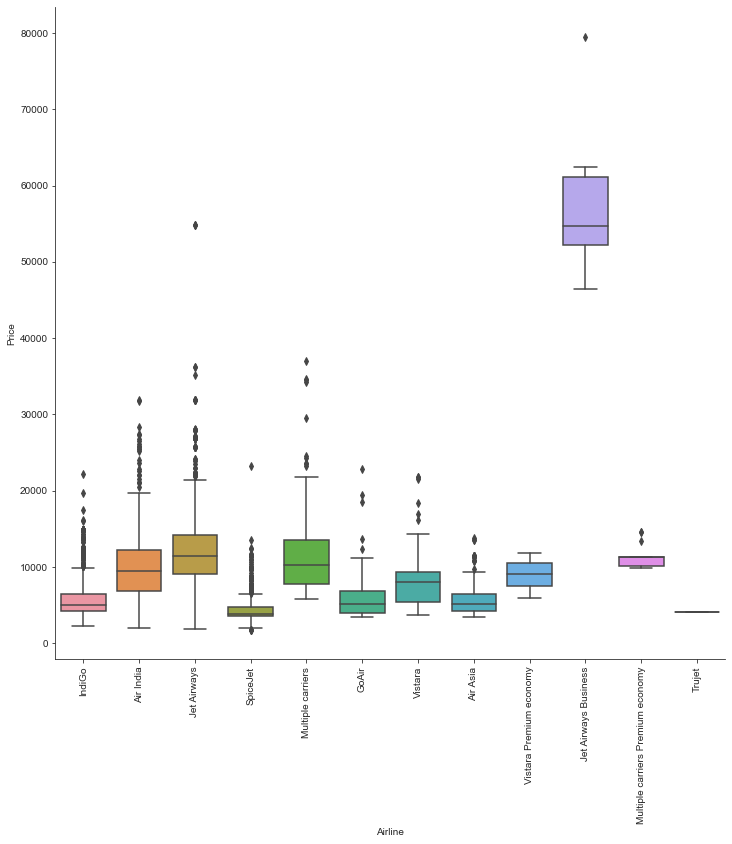

In [89]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Airline", y="Price", data=all_, ax=ax)
plt.xticks(rotation=90)
sns.despine()

I can give a rank to the airline company.

In [29]:
## I will associate label according to the distribution of the price for each label in Additional Info
all_ = all_.replace('Trujet', float(0))
all_ = all_.replace('SpiceJet', float(1))
all_ = all_.replace('IndiGo', float(2)) 
all_ = all_.replace('Air Asia', float(2.5))
all_ = all_.replace('GoAir', float(3))
all_ = all_.replace('Vistara', float(4))
all_ = all_.replace('Vistara Premium economy', float(4.5))
all_ = all_.replace('Air India', float(5))
all_ = all_.replace('Jet Airways', float(5.5))
all_ = all_.replace('Multiple carriers', float(6))
all_ = all_.replace('Multiple carriers Premium economy', float(6.5))
all_ = all_.replace('Jet Airways Business', float(8))
all_.Airline.value_counts()

5.5    4746
2.0    2564
5.0    2191
6.0    1543
1.0    1026
4.0     608
2.5     405
3.0     240
6.5      16
8.0       8
4.5       5
0.0       1
Name: Airline, dtype: int64

In [30]:
all_.head()

,Airline,Duration,Additional_Info,Price,Month,Day,dayofweek_num,dayofweek_name,stopover_1,stopover_2,...,stopover_4,total_stop,Hour_Dep,Hour_Arr,CSD_Banglore/Delhi,CSD_Banglore/New Delhi,CSD_Chennai/Kolkata,CSD_Delhi/Cochin,CSD_Kolkata/Banglore,CSD_Mumbai/Hyderabad
0,2.0,2.50,0.0,3897.0,3,24,6,Sunday,NaN,NaN,...,NaN,0,22,1,0,1,0,0,0,0
1,5.0,7.25,0.0,7662.0,1,5,5,Saturday,IXR,BBI,...,NaN,2,5,13,0,0,0,0,1,0
2,5.5,19.00,0.0,13882.0,9,6,4,Friday,LKO,BOM,...,NaN,2,9,4,0,0,0,1,0,0
3,2.0,5.25,0.0,6218.0,12,5,3,Thursday,NAG,NaN,...,NaN,1,18,23,0,0,0,0,1,0
4,2.0,4.45,0.0,13302.0,1,3,3,Thursday,NAG,NaN,...,NaN,1,16,21,0,1,0,0,0,0


Im gonna hot encode month and dayweek_num

In [31]:
all_ = pd.concat([all_, pd.get_dummies(all_['Month'], prefix='Month')], axis=1)
all_ = all_.drop(['Month'], axis=1)
all_ = pd.concat([all_, pd.get_dummies(all_['dayofweek_name'], prefix='dname')], axis=1)
all_ = all_.drop(['dayofweek_name', 'dayofweek_num', 'Day'], axis=1)
all_.head()

,Airline,Duration,Additional_Info,Price,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,Month_6,Month_9,Month_12,dname_Friday,dname_Monday,dname_Saturday,dname_Sunday,dname_Thursday,dname_Tuesday,dname_Wednesday
0,2.0,2.50,0.0,3897.0,NaN,NaN,NaN,NaN,0,22,...,0,0,0,0,0,0,1,0,0,0
1,5.0,7.25,0.0,7662.0,IXR,BBI,NaN,NaN,2,5,...,0,0,0,0,0,1,0,0,0,0
2,5.5,19.00,0.0,13882.0,LKO,BOM,NaN,NaN,2,9,...,0,1,0,1,0,0,0,0,0,0
3,2.0,5.25,0.0,6218.0,NAG,NaN,NaN,NaN,1,18,...,0,0,1,0,0,0,0,1,0,0
4,2.0,4.45,0.0,13302.0,NAG,NaN,NaN,NaN,1,16,...,0,0,0,0,0,0,0,1,0,0


## Pycaret With Advanced Settings

Well, Pycaret handle missing value by computing the most common value, This is bad for the features such as stopover_1 etc ... I will fill NA with None

In [32]:
all_ = all_.fillna(value='None')
all_.head()

,Airline,Duration,Additional_Info,Price,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,Month_6,Month_9,Month_12,dname_Friday,dname_Monday,dname_Saturday,dname_Sunday,dname_Thursday,dname_Tuesday,dname_Wednesday
0,2.0,2.50,0.0,3897,None,None,None,None,0,22,...,0,0,0,0,0,0,1,0,0,0
1,5.0,7.25,0.0,7662,IXR,BBI,None,None,2,5,...,0,0,0,0,0,1,0,0,0,0
2,5.5,19.00,0.0,13882,LKO,BOM,None,None,2,9,...,0,1,0,1,0,0,0,0,0,0
3,2.0,5.25,0.0,6218,NAG,None,None,None,1,18,...,0,0,1,0,0,0,0,1,0,0
4,2.0,4.45,0.0,13302,NAG,None,None,None,1,16,...,0,0,0,0,0,0,0,1,0,0


In [33]:
train = all_[:len(data_train)]
test = all_[len(data_train):].drop('Price',axis=1)

In [36]:
from pycaret.regression import *
exp_reg = setup(train, target='Price', session_id = 123, silent=True, normalize = True, normalize_method = 'zscore',
             transformation = True, polynomial_features = True, 
             trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01, ignore_low_variance=True
               )

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(10682, 32)"
3,Missing Values,False
4,Numeric Features,25
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7402, 80)"


In [37]:
compare_models(exclude = ['br', 'en', 'par', 'omp', 'llar', 'knn', 'lr', 'lasso', 'ridge', 'ada', 'lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,849.0109,2448931.5198,1531.4258,0.8910,0.1406,0.1002,4.0460
xgboost,Extreme Gradient Boosting,786.8432,2494997.9000,1551.9343,0.8873,0.1360,0.0920,0.9510
et,Extra Trees Regressor,666.1607,2576039.1246,1584.0942,0.8828,0.1379,0.0749,0.7440
rf,Random Forest Regressor,689.8332,2990917.5264,1658.1717,0.8699,0.1333,0.0774,0.7600
lightgbm,Light Gradient Boosting Machine,897.3557,3178977.8780,1721.0959,0.8613,0.1479,0.1048,0.0610
gbr,Gradient Boosting Regressor,1202.8776,3610702.6276,1877.9764,0.8359,0.1855,0.1442,0.3110
dt,Decision Tree Regressor,796.9517,5260413.8355,2235.9836,0.7631,0.1705,0.0873,0.0420
huber,Huber Regressor,1638.0313,6525539.6973,2529.4250,0.7040,0.2922,0.2016,0.2060
ada,AdaBoost Regressor,3213.8344,15282522.1005,3890.3518,0.2637,0.4760,0.5250,0.2710
lar,Least Angle Regression,23959520759630.2734,11164059258944939525276696576.0000,33452894630852.8438,-588312884717180157952.0000,8.6892,3083475405.3191,0.3950


In [38]:
# Take the 4 bests models
catb = create_model('catboost', verbose=False)
xgb = create_model('xgboost', verbose=False)
rf = create_model('rf', verbose=False)
et = create_model('et', verbose=False)

In [39]:
# Blend all the 4 bests models
blend_all = blend_models(estimator_list = [catb, xgb, rf, et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,638.3423,1153664.0795,1074.0876,0.9376,0.1081,0.0735
1,695.5042,2470679.0254,1571.8394,0.9027,0.1257,0.0752
2,631.3076,1433962.6464,1197.4818,0.9268,0.1113,0.0734
3,713.4827,2981484.7675,1726.6976,0.8634,0.1278,0.0829
4,668.5572,1243119.1090,1114.9525,0.9273,0.1212,0.0825
5,722.9886,1995511.5586,1412.6258,0.8985,0.1353,0.0851
6,744.7923,1830890.5560,1353.1040,0.9142,0.1329,0.0843
7,720.6998,2767145.5207,1663.4739,0.8920,0.1370,0.0791
8,766.4514,4822291.6800,2195.9717,0.8322,0.1354,0.0859
9,658.3070,1454014.6711,1205.8253,0.9234,0.1225,0.0785


In [40]:
# Finalise models and make predictions
final_blender = finalize_model(blend_all)
predictions = predict_model(final_blender, data = test)
predictions.head()

,Airline,Duration,Additional_Info,Day,stopover_1,stopover_2,stopover_3,stopover_4,total_stop,Hour_Dep,...,Month_9,Month_12,dname_Friday,dname_Monday,dname_Saturday,dname_Sunday,dname_Thursday,dname_Tuesday,dname_Wednesday,Label
0,5.5,10.55,0.0,6,BOM,None,None,None,1,17,...,0,0,0,0,0,0,1,0,0,14359.362099
1,2.0,4.00,0.0,5,MAA,None,None,None,1,6,...,0,1,0,0,0,0,1,0,0,4414.196931
2,5.5,23.45,-1.0,21,BOM,None,None,None,1,19,...,0,0,0,0,0,0,0,1,0,12914.647513
3,6.0,13.00,0.0,21,BOM,None,None,None,1,8,...,0,0,0,0,0,0,0,1,0,12037.516700
4,2.5,2.50,0.0,24,None,None,None,None,0,23,...,0,0,0,1,0,0,0,0,0,3751.166042


In [41]:
predictions['Price'] = predictions['Label']
predictions[['Price']].to_excel('submission_2.xlsx', index=False)

**The score is 0.9477 which is a (very) little better than the previous one (0.9449) , Nevertheless, My old rank was 85 and now it's 58 which is an improvment.**